# Rzuty wolne w koszykówce
Filip Osczepaliński, Adam Łojowski


# Wstęp

$\newline$
<span style='font-family:"Arial"'> 
Zadaniem naszego projektu jest analiza oraz zasymulowanie toru lotu piłki koszykowej posłanej w trakcie rzutu wolnego. Ostatecznym celem pracy jest wykorzystanie symulacji numerycznej (Rugena-Kutta) do znalezienia wartości prędkości oraz kątów, które zapewnią trafiony rzut do kosza.

</span>

# Biblioteki pythonwe potrzebne do projektu

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from math import sqrt, pow, pi, cos, sin

## Stałe używane w symulacji


$\begin{aligned}
&\text{masa piłki: } && \text{m} = 0.635  \text{kg} \\
&\text{promień piłki: } && \text{R} = 0.12  \text{m} \\
&\text{średnica piłki: } && \text{D} = 0.24  \text{m} \\
&\text{objętość piłki: } && \text{V} = 0.007  \text{m}^3\\
&\text{pole przekroju poprzecznego piłki:} && \text{A} = 0.18  \text{m}^2 \\
&\text{moment bezwładności piłki: } && \text{I}= 0.006  \text{kg} \cdot \text{m}^2 \\
&\text{współczynnik oporu powietrza dla piłki: } && \text{C}_\text{X} = 0.24 \\
&\text{współczynnik sprężystości piłki: } && \text{k} = 45000  \tfrac{\text{N}}{\text{m}} \\
&\text{współczynnik siły nośnej dla piłki: } && \text{C}_\text{L} = 0.25  \tfrac{\text{rad}}{s} \\
&\text{promień przekroju poprzecznego obręczy: } && R_{\operatorname{rim}} = 0.009  \text{m} \\
&\text{przyspieszenie grawitacyjne: } && \text{g} = 9.81  \tfrac{\text{m}}{\text{s}^2} \\
&\text{gęstość powietrza }(20^{\circ}\text{C},1013\text{kPa):} && \rho = 1.205 \tfrac{\text{kg}}{\text{m}^3} \\
\end{aligned}$


In [2]:
import sys
#Piłka
m = 0.635
R = 0.12
D = 0.24
V = 0.007
A = 0.18 
I = 0.006
CX = 0.24
k = 45000
CL = 0.25
#Pozostałe stałe fizyczne 
g = 9.81
ro = 1.205
#omega = w

## Oznaczenia potrzebnych odległości i wymiarów

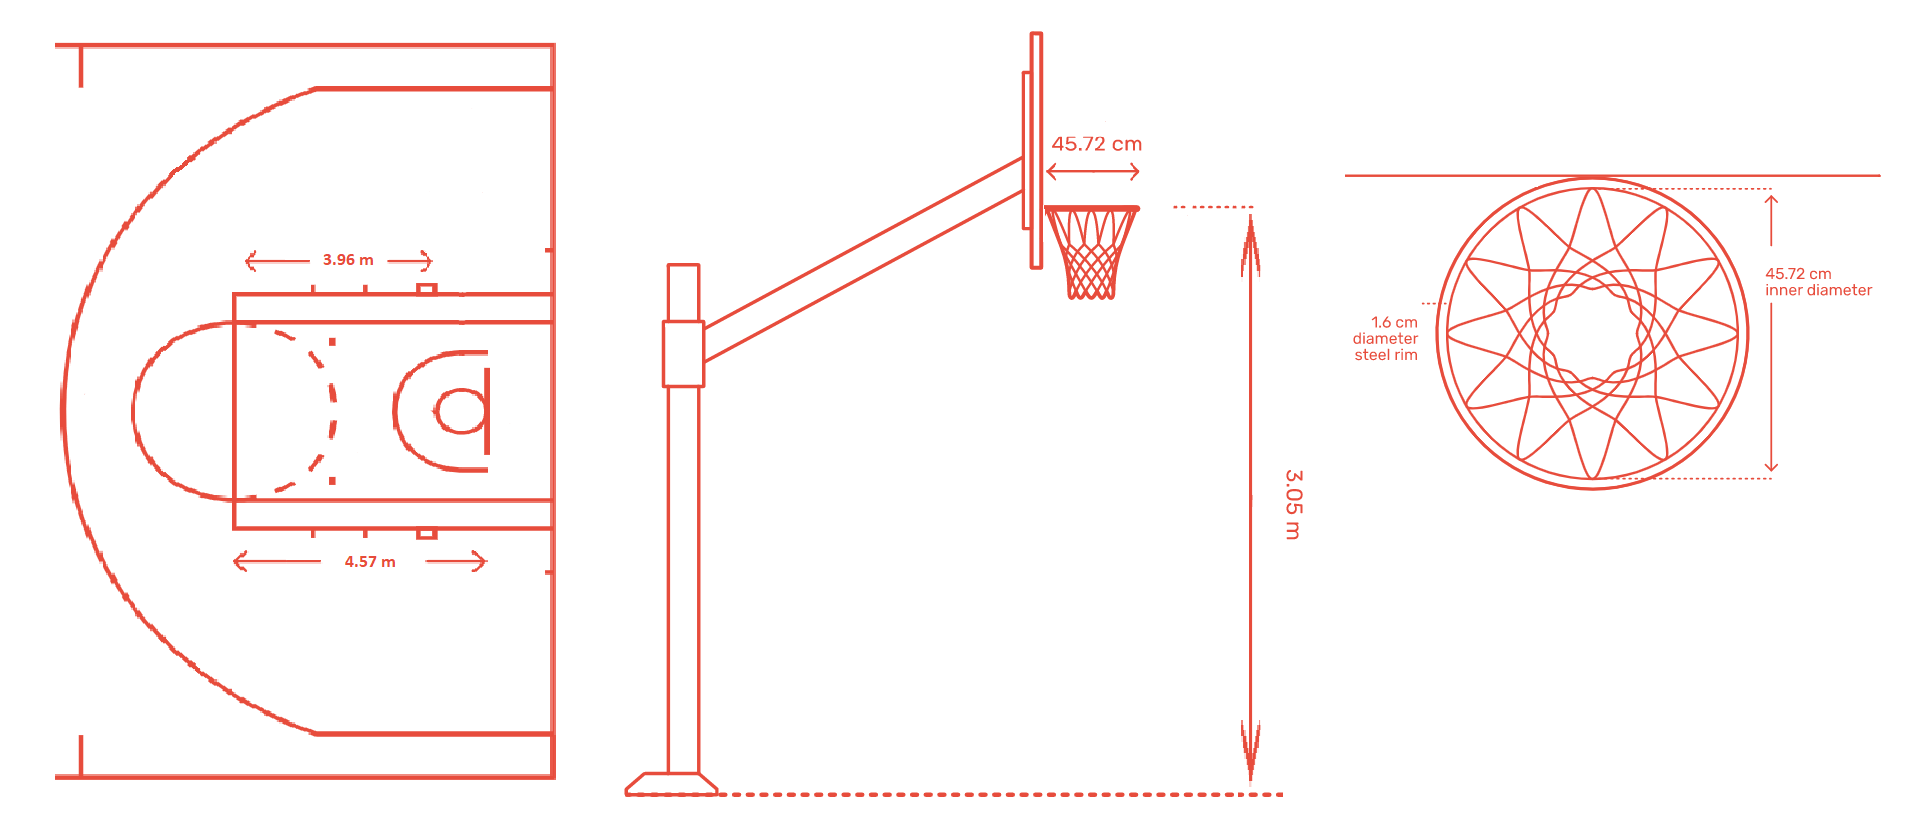

In [3]:
#Wysokość garcza
y_0 = 1.77
#Kosz 
R_hoop = 0.23
R_rim = 0.008
x_rim_board = 0.15
#Boisko
free_throw_line_x = 3.96
y_rim = 3.05
y_board = 2.9
h_board = 0.9
x_rim_front = 3.936
x_rim_back = 4.412
x_board = 4.57;
B = ro*V*g


# Metody numeryczne


##  Metoda Rungego-Kutty dla IV rzędu


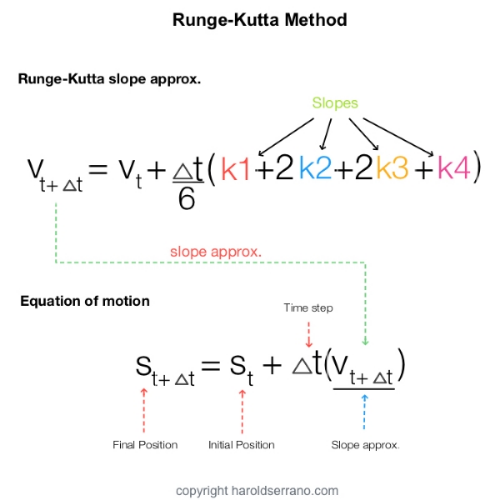

In [4]:
def add_to_list(lis, lis2,n=1):  
    
    """Funkcja pomocnicza do algorytmu RK
        
        Dodaje do siebie wartości obu list zgodnie z indeksami,
        czyli tak jakby to było dodawanie macierzy.
        Dodatkowo elementy drugiej listy mogą zostać podzielone przez n."""
    
    check_list = []
    for j in range(len(lis)):
        to_list = lis[j]+lis2[j]/n
        check_list.append(to_list)
    return check_list

def multiply_list(lis, n):
    
    """Funkcja pomocnicza do algorytmu RK
    
        Pomnóż wszystkie elementy listy przez n"""
    
    check_list = []
    for i in range(len(lis)):
        to_list = lis[i]*n
        check_list.append(to_list)
    return check_list


def rungekutta4(f, t, li):
    t_range = np.linspace(0,t,1000)
    values = [li]
    h = (t[-1]-t[0])/len(t)
    for i in range(len(t_range)):
        
        k1 = multiply_list(f(t_range[i], values[i]),h)
        k2 = multiply_list(f(t_range[i] + h/2, add_to_list(values[i], k1, 2)),h)
        k3 = multiply_list(f(t_range[i] + h/2, add_to_list(values[i], k2, 2)), h)
        k4 = multiply_list(f(t_range[i] + h, add_to_list(values[i], k3,1)),h)
        
        
        k1k2 = add_to_list(k1,k2,2)
        k3k4 = add_to_list(k4,k3,2)
        
        k1k2k3k4 = add_to_list(k1k2,k3k4)
        for j in range(len(k1k2k3k4)):
            k1k2k3k4[j] = k1k2k3k4[j]/6 
        values.append(add_to_list(values[i], k1k2k3k4))
        #print(values[i][0])
    
    return values

# 1. Wprowadzenie
$\newline$
<span style='font-family:"Arial"'> 
    <p>Rzut wolny, jest to w koszykówce specjalna
        okazja do zdobycia punków w momencie, gdy ten zostaje sfaulowany, bądź drużyna przeciwna popełni błąd techniczny. Rzut ten wykonuje się z lini wolnej, oddalonej od kosza o 3.96m(13ft.) według ligi **NBA**.
    </p>
    <p>Z racji, że w ciągu jednego meczu może paść łącznie kilkanaście, a nawet i kilkadziesiąt rzutów wolnych, warto przyjrzeć się bliżej temu zagadnieniu od matematycznej strony.</p>
    <p>
        Układ współrzędnych określony przez $x,y$, gdzie $x$ to oś biegnąca równolegle do boiska, w najprostszym przykładzie do jego dłuższego boku, a $y$ będzie określać wysokość. W takim układzie możemy określić wartości składowe wektora prędkości początkowej jako </p> 
    <p>$$\left\{
    \begin{array}\\
        \dot{x}=v_{0}cos \theta_{0}\\
        \dot{y}= v_{0}sin \theta_{0}
    \end{array}
    \right.$$</p>

    

    
    
    
</span> 


<span style='font-family:"Arial"'>
W tym przypadku $v_0$ będzie wartością prędkości początkowej, a $\theta_0$ kątem wyrzutu. Podczas naszej pracy będziemy chcieli zasymulować lot piłki koszykowej wykorzystując do tego kilka modeli matematycznych. Oczywiście, naszym zadaniem jest znalezienie takich wartości parametrów $v_0$ i $\theta_0$, przy których piłka wpadnie do kosza.
</span>

<span style='font-family:"Arial"'>
By tego dokonać, będziemy musieli zdefiniować stałe fizyczne, które będą niebędne do przeprowadzenia symulacji. Dodatkowo wykorzystamy pozostałe parametry takie jak wymiary boiska, piłki i kosza, które będą odpowiadać oficjalnom standardom National Basketball Association, czyli najpopularniejszej ligi koszykarskiej.
</span>

# Sformułowanie zagadnienia


<span style='font-family:"Arial"'>
Będziemy rozpatrywać rzut wolny, wykonany przez osobę posiadającej 1.77 m wzrostu. Taki bowiem jest średni wzrost mężczyzn w Polsce. Zawodnik stoi w odlełości 3.96 m od lini kosza. Podczas rzutu, koszykarz nadaje piłce prędność początkową $v_0$ oraz prędkość kątową $\omega$.
    
Dodatkowo zakładamy, że:
* piłka jest idealną, jednorodną sferą o promieniu $R$
* piłka porusza się wyłącznie wzdłóż osi $x$ oraz $y$
* wektor prędkości kątowej $\omega$ jest prostopadły do płaszczyzny osi $x$ oraz $y$
</span>

# Siły działające na piłke

<span style='font-family:"Arial"'>
Jeśli myślimy o rzucie jakimś przedmiotem, odrazu przychodzi nam na myśl siła ciężkości i opór powietrza. Jednakże pojawiją się dwie dodatkowe siły, które nam trudno sobie wyobrazić.

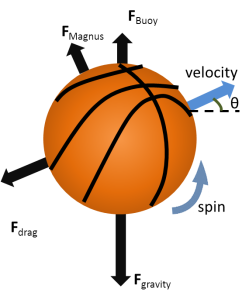

### Siła ciękżości


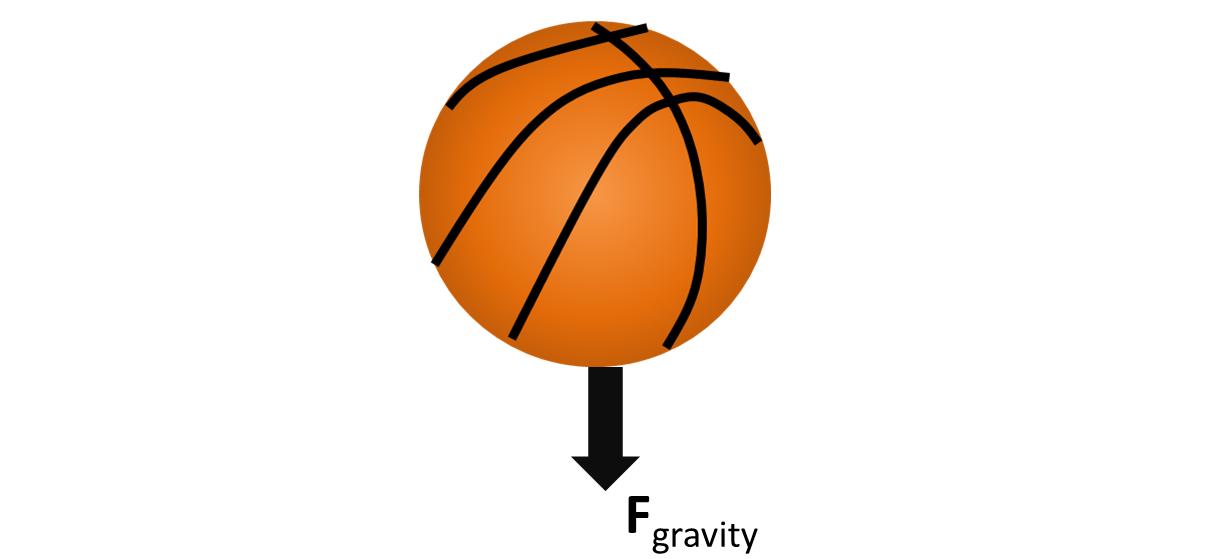

<span style='font-family:"Arial"'>
Siła ciężkości jest skierowana prostopadle do podłoża (Ziemi) i jest podana wzorem:
$\newline$
    $$F_{G}=-mg\hat{j}$$
</span>

### Siła oporu powietrza
___

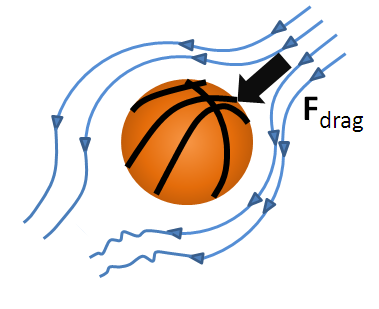

Dla siły oporu powietrza zakładamy, że jest proporcjonalna do kwadratu prędkości $\vec{v} = |\vec{v}|\hat{v}$ . Wtedy siła oporu powietrza przyjmuje równanie:
    $$\newline$$
        $$\vec{F}_{o} = -C_{X}\rho A|\vec{v}|^2\hat{v} = -C_{X}\rho A|\vec{v}|\vec{v} = -C_{X}\rho A\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{i}+\dot{y}\hat{j})$$
        
Po zauważeniu, że $C_{X}\rho A$ jest stałą, dla uproszczenia zapisu oraz łatwiejsze implemantacji w symulacji zamienimy na $b$ i otrzymamy równanie: 
$\newline$
$$\vec{F}_{o} = -C_{X}\rho A\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{i}+\dot{y}\hat{j}) = -b\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{i}+\dot{y}\hat{j})$$    
</span>

In [5]:
b = CX*ro*A

### Siła wyporu

<span style='font-family:"Arial"'>
Siłę wyporu, która działa wzdłóż osi y, obliczymy za pomocą prawa Archimedesa:
    $$\newline$$
$$\vec{F}_w = \rho Vg\hat{j}$$
    
Ale ponieważ $\rho Vg$ jest stałą to oznaczymy ją jako $B$ i po zastosowaniu wzór przyjmuje równanie:
    $\newline$
$$\vec{F}_w = B\hat{j}$$
</span>

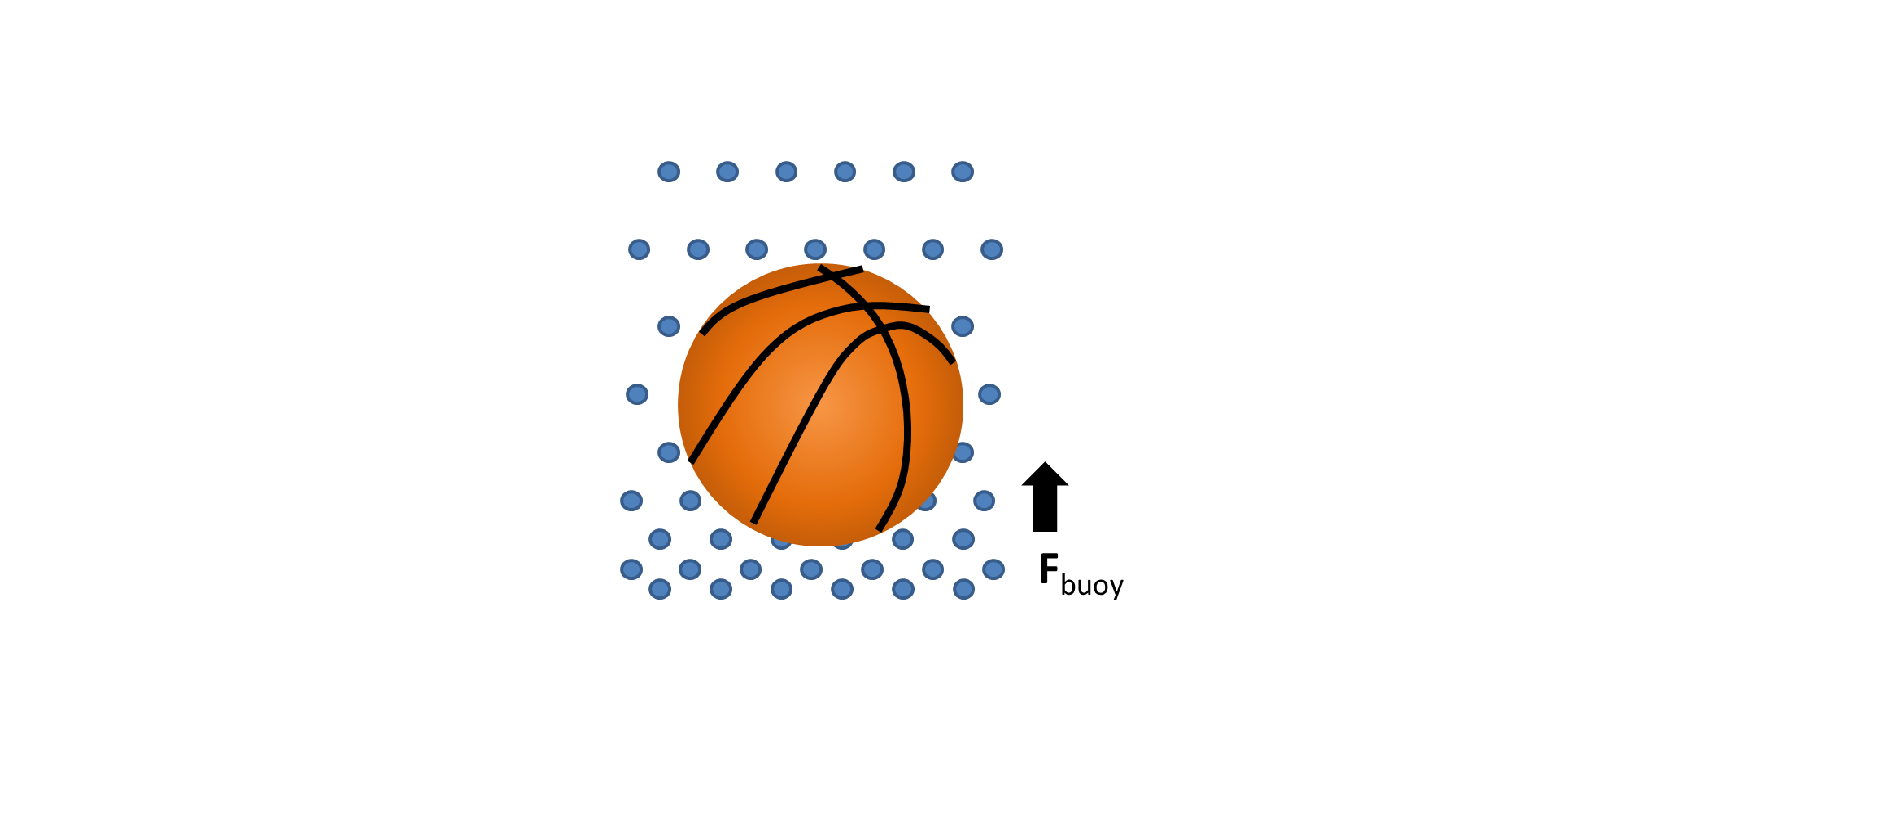

### Siła Magnusa

<span style='font-family:"Arial"'>
   Podczas rzutu piłka, piłka zaczyna się obracać i w ten sposób powstaje ostatnia siła, która oddziałowuje na piłke. Kierunek siły Magnusa jest wynikiem iloczynu wektorowego $\vec{\omega}\times\vec{v}$. Siła Magnusa jest podana wzorem:
    $\newline$
   $$\vec{F}_{\text{Magnus}}=C_{Z}\rho D^3\vec{\omega}\times\vec{v}$$ 
    
dla uproszczenia zastąpimy $C_{Z}\rho D^3$ = $c$. Zatem teraz wzór przyjmuje postać:
    $\newline$
    $$\vec{F}_{\text{Magnus}}=c\vec{\omega}\times\vec{v}=c\omega(-\dot{y}\hat{i} + \dot{x}\hat{j})$$
    
</span>

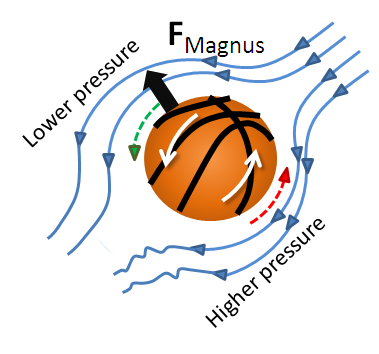

In [6]:
c = CL*ro*pow(D,3)
print(c)

0.00416448


<span style='font-family:"Arial"'>
Teraz łącząc wszystkie modele i wykorzystując równanie Newtona otrzymujemy:
$\newline$
$$m\vec{a} = m\dot{\vec{v}}=m(\ddot{x}\hat{i}+\ddot{y}\hat{j})=(-b\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}-c\dot{y}\omega)\hat{i}+(-mg-b\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}+B+c\dot{x}\omega)\hat{j}$$

Z tego możemy ułożyć równania różniczkowe:
$\newline$
$$\begin{cases}
m\ddot{x}&=-b\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}-c\dot{y}\omega\\
m\ddot{y}&=-mg-b\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}+B+c\dot{x}\omega
\end{cases}$$
</span>

# Symulacja


## Szukanie wszystkich wartości prędkości i kątów początkowych


##### $\textbf{Oznaczenia użyte w symulacji:}$

<span style='font-family:"Arial"'>
$\begin{aligned}    
&\text{rozpatrywana maksymalna prędkość wyrzutu: } && \textit{v_0} \\
&\text{największy rozpatrywany kąt wyrzutu: } && \textit{O_0} \\
&\text{czas lotu piłki: } && t\\
\end{aligned}$    

</span>

<span style='font-family:"Arial"'>
Z tej symulacji otrzymujemy zestaw wartości $\, v_0, \, \theta_0 \,$ dla których trajektoria lotu piłki spełnia warunek odpowiedniego "przejścia" przez obręcz.
</span>

## Algorytm

In [7]:



def rungekutta4(f, t, li):
    t_range = np.linspace(0,t,1000)
    values = [li]
    h = (t[-1]-t[0])/len(t) #krok, którym przechodzimy jest zależny od czasu
    
    for i in range(len(t_range)): #algorytm wykonuje się tworząc listy wszystkich wartości rzutu
        
        #w algorytmie użyte są funkcje pomocnicze, dzięki którym możemy wykonywać algorytm
        
        k1 = multiply_list(f(t_range[i], values[i]),h) #pracujemy jednocześnie na wszystkich wartościach
        k2 = multiply_list(f(t_range[i] + h/2, add_to_list(values[i], k1, 2)),h)
        k3 = multiply_list(f(t_range[i] + h/2, add_to_list(values[i], k2, 2)), h)
        k4 = multiply_list(f(t_range[i] + h, add_to_list(values[i], k3,1)),h)
        
        #sumujemy wyniki, żeby odstać k1k2k3k4
        
        k1k2 = add_to_list(k1,k2,2)
        k3k4 = add_to_list(k4,k3,2)
        
        k1k2k3k4 = add_to_list(k1k2,k3k4)
        for j in range(len(k1k2k3k4)):
            k1k2k3k4[j] = k1k2k3k4[j]/6 
        #dodajemy wynik do listy
        values.append(add_to_list(values[i], k1k2k3k4))
        if values[i][2] < 0:  #jeśli wartość y będzie mniejsza niż 0, to wtedy kończymy symulację
            break
    
    return values

def plot_throw(t, v_0, O_0, w):
    point = 0
    r_0 = O_0/180*pi
    x_0  = 0
    li = [x_0, v_0*cos(r_0), y_0, v_0*sin(r_0),w] #początkowe wartości
    t_range = np.linspace(0,t,t*100)
    sol = rungekutta4(Function, t_range, li) #otrzymujemy macierz z wszystkimi wartościami w trakcie lotu
    x_vals = []
    y_vals = []
    for i in range(len(sol)):
        x_vals.append(sol[i][0])
        y_vals.append(sol[i][2])
    if is_point(sol):
        print("trafienie")
    plot_pitch(x_vals, y_vals)
    
    
def Fx(dx,dy):
    return -b*dx*((dx**2 + dy**2)**0.5)-c*dy*w

def Fy(dx,dy):
    return -g*m-b*dy*((dx**2 + dy**2)**0.5) + B + c*w*dx
def F_board(m,a):
        return m*a
        
        

def is_board_coll(x,y, n = True):
    if x > x_board-R_hoop and y > y_board and y < y_board+0.928:
        return True
    else:
        return False
    
def is_rim_coll(x,y):
    middle_x = free_throw_line_x+R_hoop
    middle_y = y_rim

    check = sqrt((x-middle_x)^2+(y-middle_y)^2)

    if check < R+R_rim:
        return True
    else:
        return False 

def is_point(li):
    #musimy postawić warunki na to, że trajektoria lotu piłki kończy się punktem
    
    above = False
    for i in range(len(li)): #szukamy tych warunków we wszystkich położeniach x,y w trakcie rzutu
        if li[i][2] > y_rim+R_hoop and x_rim_front < li[i][0] < x_rim_back: #piłka musi znaleźć się ponad i między obręczą
            above = True
            break
            
    if above: #jeśli poprzedni warunek został spełniony
        for i in range(len(li)): #czy piłka znalazła się między i pod obręczą. Jeśli tak, to jest to trafienie
            if li[i][2] <= y_rim and x_rim_front+R_hoop < li[i][0] < x_rim_back-R_hoop:
                return True

def Function(t,lis):
    x1,x2,y1,y2,w = lis
        
    return [x2, Fx(x2,y2)/m, y2, Fy(x2,y2)/m,0]

In [8]:
def throw(t, v_0, O_0,w):
    r_0 = O_0/180*pi
    x_0  = 0
    li = [x_0, v_0*cos(r_0), y_0, v_0*sin(r_0),w]
    t_range = np.linspace(0,t,t*100)
    sol = rungekutta4(Function, t_range, li)
    #print(sol)
    return sol

w = 4*pi
def find_values(t, w,v_0,O_0):
    good_values = []
    v_range = np.linspace(0,v_0,v_0*3)
    O_range = np.linspace(0,O_0,O_0*3)

    
    for i in v_range: #próbujemy rzut dla wszystkich wartości v_0 i O_0
        for j in O_range: #dla zachowania szybkości kodu kroki v_0 są co 0.5m/s, a O_0 co 1*
            check = throw(t,i/2,j,w)
            if is_point(check): #sprawdzamy, czy rzut okazał się trafiony. Jeśli tak, do dodajemy wartości do listy
                good_values.append([i/2,j])
    
    return good_values

jaj = find_values(3,4*pi,30,90)


## Wizualizacja symulacji

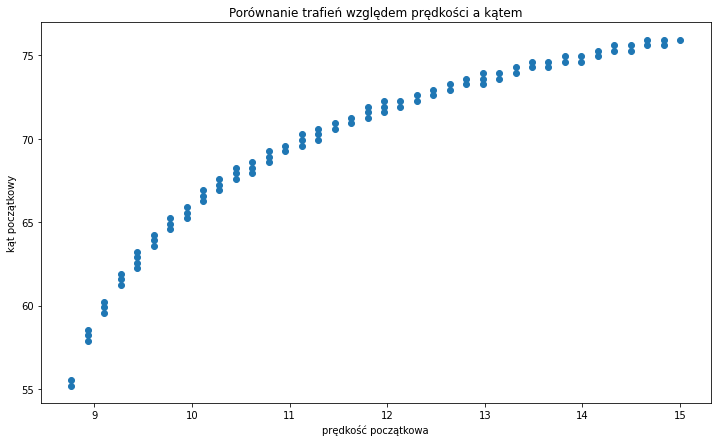

In [9]:
speed = [jaj[i][0] for i in range(0,len(jaj))]
angle = [jaj[i][1] for i in range(0,len(jaj))]
fig = plt.figure(figsize = (12,7))
plt.scatter(speed,angle)
plt.xlabel('prędkość początkowa')
plt.ylabel('kąt początkowy')
plt.title("Porównanie trafień względem prędkości a kątem")
plt.show()

# Analiza symulacji

<span style='font-family:"Arial"'>
Z obserwacji symulacji, którą przeprowadziliśmy dla koszykarza o wzroście 1.77m, możemy wywnioskować, że piłka do kosza zaczyna trafiać dla prędkości większej niż $8\frac{\mathrm{m}}{\mathrm{s}}$ i mniejszej lub równej niż $15\frac{\mathrm{m}}{\mathrm{s}}$. Dodatkowo, dla niektórych prędkości istnieje kilka kątów, dla których rzut jest celny . Jednocześnie wartości układają się postać krzywej wykładniczej.
</span>

# Podsumowanie

W projekcie udało nam się przybliżyć mechanikę rzutu do kosza. Pomogło nam w tym wykorzystanie równań różniczkowych oraz metod numerycznych. Z ich pomocą mogiśmy przeprowadzić symulację i wyciągnąć wnioski, takie jak fakt,że wraz ze wzrostem prędkości rzutu musimy coraz bardziej zwiększać jego kąt . Dodatkowo są prędkości, dla których jest większy margines błedu kąta rzutu. Gdy zwiększyć ilość punktów prędkości i kątów to moglibyśmy odkryć, która prędkość jest najbardziej efektywna.

# Literatura
___
Siły rysunki: 
https://physicsofbasketball.wordpress.com/2014/05/18/forces-acting-on-a-basketball-in-flight/ 

Siły opis:

https://indico.cern.ch/event/163205/contributions/1413227/attachments/192775/270516/Team351.pdf

https://arxiv.org/pdf/1702.07234.pdf

Informacje o piłce: https://ballergears.com/how-much-does-a-basketball-weigh/ 

Reszta uzupełniająca: https://iopscience.iop.org/article/10.1088/1367-2630/16/3/033039/pdf

https://core.ac.uk/download/pdf/81927888.pdf

Współczynnik Magnusa:
https://www.grc.nasa.gov/www/k-12/airplane/soclift.html


Grafika :

https://www.dimensions.com/element/basketball-rims-nets

https://www.dimensions.com/element/basketball-court

https://www.dimensions.com/element/basketball-rims-nets

Metody numeryczne

https://www.haroldserrano.com/blog/visualizing-the-runge-kutta-method

https://www.dimensions.com/element/basketball-rims-nets